<a href="https://colab.research.google.com/github/cef1911/NaturalLanguageProcessing/blob/main/Nov_2022_Review_Notebook_for_Prediction_Model_Final_Graded_Assignment_for_NLP_For_Chris_Franklin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Up Basic Dependencies

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

### Load and View the Dataset

**Loading DataSet if using Google Colab**

In [ ]:
df = pd.read_csv(r'/content/sample_data/Train_Data.csv', keep_default_na=False)
df.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


# Loading Dataset if using Juypter Notebook

In [ ]:
df = pd.read_csv(r'C:\Users\cef19\Desktop\DPhi\Train_Data.csv', keep_default_na=False)
df.head()

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44262 entries, 0 to 44261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      44262 non-null  object
 1   is_sarcastic  44262 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 691.7+ KB


In [ ]:
df

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0
...,...,...
44257,greece seeks to reassure europe as tensions rise,0
44258,vatican says transgender man cannot become a g...,0
44259,protesters ejected from donald trump rally aft...,0
44260,italian recipes that are oldies but goodies,0


### Build train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['headline']], df['is_sarcastic'], random_state=42)
X_train.shape, X_test.shape

((33196, 1), (11066, 1))

In [ ]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({1: 15185, 0: 18011}), Counter({1: 5119, 0: 5947}))

### Basic NLP Count based Features

In [ ]:
import string

X_train['char_count'] = X_train['headline'].apply(len)
X_train['word_count'] = X_train['headline'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

X_test['char_count'] = X_test['headline'].apply(len)
X_test['word_count'] = X_test['headline'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_test['title_word_count'] = X_test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
X_train.head()

,headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
34059,authoritarian secretary of transportation decl...,106,15,6.625000,0,0,0
6098,study: marriages between perfectly matched cou...,88,13,6.285714,1,0,0
6252,employee wellness programs aren't so voluntary...,54,7,6.750000,1,0,0
20826,p is for p*ssy' is the alphabet book of your w...,55,12,4.230769,2,0,0
24719,nothing going right for area surgeon today,42,7,5.250000,0,0,0


### Training a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

In [ ]:
lr.fit(X_train.drop(['headline'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['headline'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66      5947
           1       0.60      0.48      0.53      5119

    accuracy                           0.61     11066
   macro avg       0.61      0.60      0.60     11066
weighted avg       0.61      0.61      0.60     11066



,0,1
0,4287,1660
1,2679,2440


In [ ]:
df['Prediction'] =(df['is_sarcastic'])

In [ ]:
df

,headline,is_sarcastic,Prediction
0,supreme court votes 7-2 to legalize all worldl...,1,1
1,hungover man horrified to learn he made dozens...,1,1
2,emily's list founder: women are the 'problem s...,0,0
3,send your kids back to school with confidence,0,0
4,watch: experts talk pesticides and health,0,0
...,...,...,...
44257,greece seeks to reassure europe as tensions rise,0,0
44258,vatican says transgender man cannot become a g...,0,0
44259,protesters ejected from donald trump rally aft...,0,0
44260,italian recipes that are oldies but goodies,0,0


In [ ]:
#df.drop(['headline', 'is_sarcastic'], axis =1, inplace = True)

In [ ]:
df

,headline,is_sarcastic,Prediction
0,supreme court votes 7-2 to legalize all worldl...,1,1
1,hungover man horrified to learn he made dozens...,1,1
2,emily's list founder: women are the 'problem s...,0,0
3,send your kids back to school with confidence,0,0
4,watch: experts talk pesticides and health,0,0
...,...,...,...
44257,greece seeks to reassure europe as tensions rise,0,0
44258,vatican says transgender man cannot become a g...,0,0
44259,protesters ejected from donald trump rally aft...,0,0
44260,italian recipes that are oldies but goodies,0,0


### Leveraging Text Sentiment

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import textblob

textblob.TextBlob('u.s. dignity reserves nearly depleted').sentiment

Sentiment(polarity=0.1, subjectivity=0.4)

### Features from Sentiment Analysis

In [ ]:
x_train_snt_obj = X_train['headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

x_test_snt_obj = X_test['headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [ ]:
X_train.head()

,headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
34059,authoritarian secretary of transportation decl...,106,15,6.625000,0,0,0,0.142857,0.767857
6098,study: marriages between perfectly matched cou...,88,13,6.285714,1,0,0,0.333333,0.688889
6252,employee wellness programs aren't so voluntary...,54,7,6.750000,1,0,0,0.000000,0.000000
20826,p is for p*ssy' is the alphabet book of your w...,55,12,4.230769,2,0,0,-0.100000,0.400000
24719,nothing going right for area surgeon today,42,7,5.250000,0,0,0,0.285714,0.535714


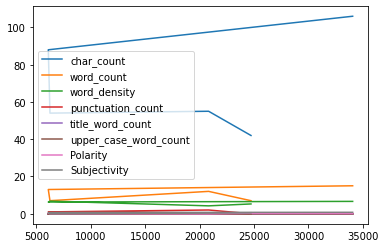

In [ ]:
X_train.head(5).plot()

In [ ]:
X_train.tail(10)

,headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
16023,people on the internet can't stop making fun o...,81,15,5.062500,4,0,0,0.400000,0.350000
44131,robbie krieger goes 51 minutes without mention...,62,9,6.200000,0,0,0,0.000000,0.000000
21962,college freshman experiences first tantalizing...,123,18,6.473684,0,0,0,0.250000,0.333333
37194,getting the facts right about the ferguson gra...,62,10,5.636364,0,0,0,0.392857,0.767857
16850,angela bassett set to direct lifetime's 'whitn...,62,9,6.200000,3,0,0,0.100000,0.400000
6265,the consumer financial protection bureau: a go...,82,11,6.833333,1,0,0,0.000000,0.000000
11284,"there should never be all-male panels, ubs exe...",52,9,5.200000,2,0,0,0.000000,0.000000
38158,don't sleep on target's chic new modern home c...,75,12,5.769231,2,0,0,0.168182,0.377273
860,6 incredible photos that show the world we nee...,58,11,4.833333,0,0,0,0.900000,0.900000
15795,"after seeing a fifth-grader get bullied, this ...",85,16,5.000000,2,0,0,0.000000,0.000000


In [ ]:
X_train

,headline,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
34059,authoritarian secretary of transportation decl...,106,15,6.625000,0,0,0,0.142857,0.767857
6098,study: marriages between perfectly matched cou...,88,13,6.285714,1,0,0,0.333333,0.688889
6252,employee wellness programs aren't so voluntary...,54,7,6.750000,1,0,0,0.000000,0.000000
20826,p is for p*ssy' is the alphabet book of your w...,55,12,4.230769,2,0,0,-0.100000,0.400000
24719,nothing going right for area surgeon today,42,7,5.250000,0,0,0,0.285714,0.535714
...,...,...,...,...,...,...,...,...,...
6265,the consumer financial protection bureau: a go...,82,11,6.833333,1,0,0,0.000000,0.000000
11284,"there should never be all-male panels, ubs exe...",52,9,5.200000,2,0,0,0.000000,0.000000
38158,don't sleep on target's chic new modern home c...,75,12,5.769231,2,0,0,0.168182,0.377273
860,6 incredible photos that show the world we nee...,58,11,4.833333,0,0,0,0.900000,0.900000


### Final Model Training and Evaluation

In [ ]:
lr.fit(X_train.drop(['headline'], axis=1), y_train, )
predictions = lr.predict(X_test.drop(['headline'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67      5947
           1       0.60      0.49      0.54      5119

    accuracy                           0.61     11066
   macro avg       0.61      0.60      0.60     11066
weighted avg       0.61      0.61      0.61     11066



,0,1
0,4293,1654
1,2624,2495


**Reading Target Using Google Colab**

In [ ]:
target = pd.read_csv(r'/content/sample_data/Test_Data.csv', keep_default_na=False)

In [ ]:
target = pd.read_csv(r'C:\Users\cef19\Desktop\DPhi\Test_Data.csv', keep_default_na=False)

In [ ]:
target

,headline
0,area stand-up comedian questions the deal with...
1,dozens of glowing exit signs mercilessly taunt...
2,perfect response to heckler somewhere in prop ...
3,gop prays for ossoff lossoff
4,trevor noah says the scary truth about trump's...
...,...
11061,house conservatives claim democrats have faile...
11062,area man having one of his little bursts of en...
11063,there is nothing libertarian about conservatives
11064,mike pompeo startled after seeing 'beware of h...


In [ ]:
target['prediction'] = [1 if rating == 1 else 0 for rating in target['headline']]
target = target[['headline', 'prediction']]

In [ ]:
target

,headline,prediction
0,area stand-up comedian questions the deal with...,0
1,dozens of glowing exit signs mercilessly taunt...,0
2,perfect response to heckler somewhere in prop ...,0
3,gop prays for ossoff lossoff,0
4,trevor noah says the scary truth about trump's...,0
...,...,...
11061,house conservatives claim democrats have faile...,0
11062,area man having one of his little bursts of en...,0
11063,there is nothing libertarian about conservatives,0
11064,mike pompeo startled after seeing 'beware of h...,0


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

In [ ]:
target.drop(columns=['headline'], inplace=True)

In [ ]:
predictions = target

In [ ]:
target

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
11061,0
11062,0
11063,0
11064,0


In [ ]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = predictions.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

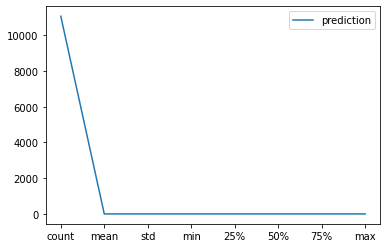

In [ ]:
res.describe().plot()